<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-required-libraries" data-toc-modified-id="Loading-required-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading required libraries</a></span></li><li><span><a href="#Loading-and-preparing-the-dataset" data-toc-modified-id="Loading-and-preparing-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and preparing the dataset</a></span><ul class="toc-item"><li><span><a href="#Splitting-dataset-into-training-and-test-data" data-toc-modified-id="Splitting-dataset-into-training-and-test-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Splitting dataset into training and test data</a></span></li><li><span><a href="#Some-information-about-the-training-data" data-toc-modified-id="Some-information-about-the-training-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Some information about the training data</a></span></li><li><span><a href="#A-closer-visual-look-at-the-training-data" data-toc-modified-id="A-closer-visual-look-at-the-training-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>A closer visual look at the training data</a></span></li></ul></li><li><span><a href="#Training-the-models" data-toc-modified-id="Training-the-models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training the models</a></span><ul class="toc-item"><li><span><a href="#Classification-trees" data-toc-modified-id="Classification-trees-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Classification trees</a></span></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forests</a></span></li><li><span><a href="#K-Nearest-Neighbours" data-toc-modified-id="K-Nearest-Neighbours-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>K Nearest Neighbours</a></span></li><li><span><a href="#Support-Vector-Machines-SVM" data-toc-modified-id="Support-Vector-Machines-SVM-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Support Vector Machines SVM</a></span></li></ul></li><li><span><a href="#Comparing-the-models" data-toc-modified-id="Comparing-the-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparing the models</a></span></li><li><span><a href="#The-entire-code-used-in-one-block" data-toc-modified-id="The-entire-code-used-in-one-block-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The entire code used in one block</a></span></li></ul></div>

# Loading required libraries

In [ ]:
# uncomment next line for installing required libraries, not required for running on rdrr.io
# install.packages(c('caret', 'e1071', 'kernlab', 'rpart.plot')) 
library(caret) # this package does the main lifting
library(e1071) # support functions for caret
library(kernlab) # support functions for caret
library(rpart.plot) # needed for plotting

# Loading and preparing the dataset
iris is a demo dataset internally available within R, classifying 150 observations of flowers into 3 categories by looking at their sepals and petals. For more info about the dataset see this [Wikipedia article](https://en.wikipedia.org/wiki/Iris_flower_data_set).
![sepal and petal of iris](iris_petal_sepal.png)

## Splitting dataset into training and test data
Here we split the data into 80% training data and 20% testing data. This can be done by using caret's createDataPartition function which also accounts for splitting the individual categories as close as possible to that ratio.

In [2]:
iris_split <- caret::createDataPartition(iris$Species, p = 0.8, list = FALSE) # Indices for splitting data
iris_train <- iris[iris_split,] # 80% of data used for training
iris_test <- iris[-iris_split,] # 20% of data used for testing and validation

## Some information about the training data

In [3]:
head(iris_train) # What does the training data look like?
summary(iris_train) # Statistcal summary of training data
str(iris_train) # Structural info of training data
levels(iris_train$Species) # List of categories of the target variable we want to predict
table(iris_train$Species) # Distribution of target variable

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.400   Min.   :2.00   Min.   :1.000   Min.   :0.100   setosa    :40  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.600   1st Qu.:0.300   versicolor:40  
 Median :5.800   Median :3.00   Median :4.400   Median :1.300   virginica :40  
 Mean   :5.877   Mean   :3.08   Mean   :3.772   Mean   :1.203                  
 3rd Qu.:6.400   3rd Qu.:3.40   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.20   Max.   :6.700   Max.   :2.500                  

'data.frame':	120 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 5 5.4 4.6 4.4 4.9 4.8 4.8 ...
 $ Sepal.Width : num  3.5 3 3.2 3.6 3.9 3.4 2.9 3.1 3.4 3 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.4 1.7 1.4 1.4 1.5 1.6 1.4 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.1 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


[1] "setosa"     "versicolor" "virginica"


    setosa versicolor  virginica 
        40         40         40 

## A closer visual look at the training data

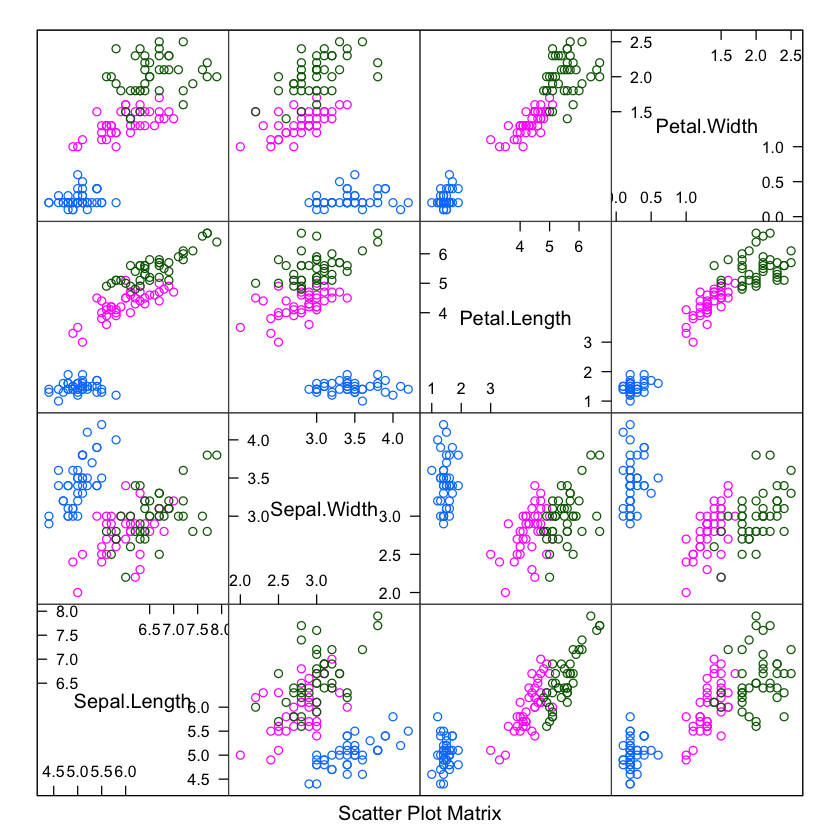

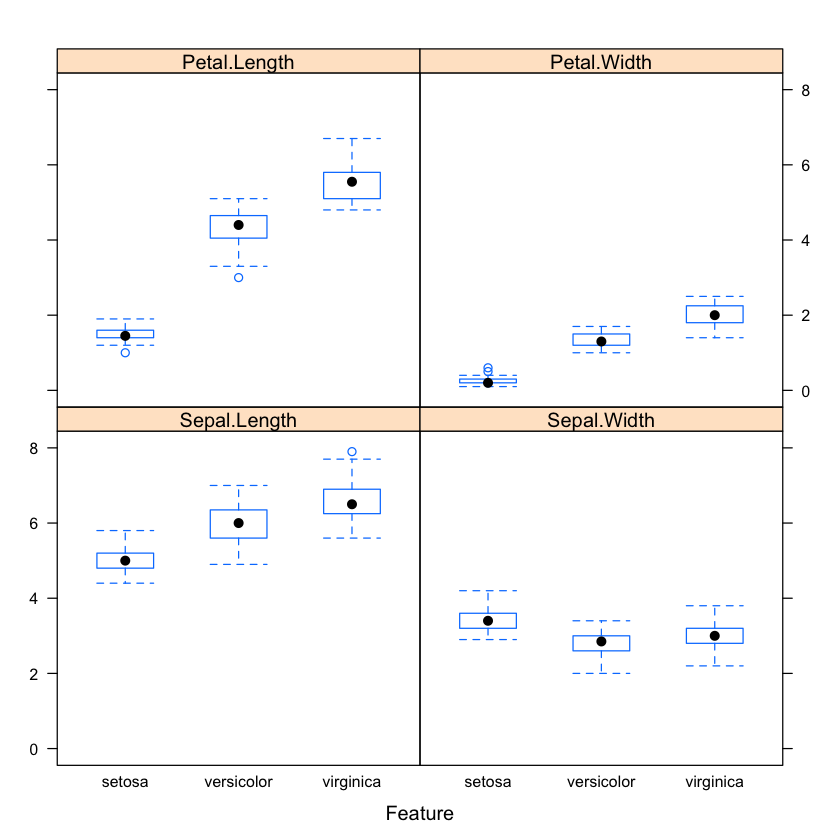

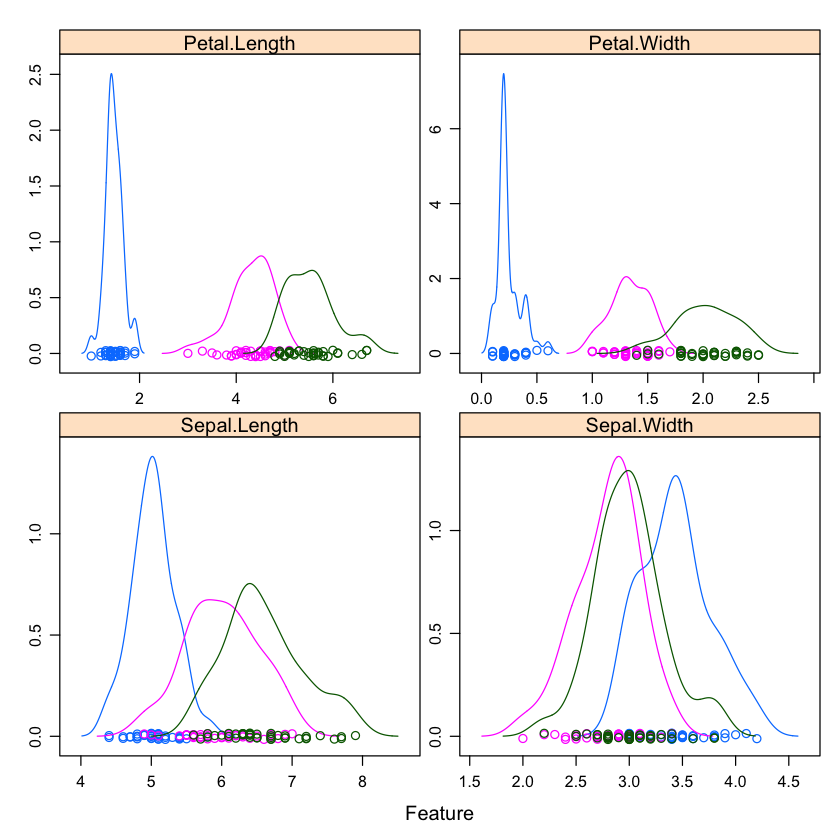

In [4]:
X <- iris_train[,1:ncol(iris_train)-1] 
y <- iris_train[,ncol(iris_train)]
caret::featurePlot(x=X, y=y, plot='pairs') # pairwise plot, e.g. for checking strong correlations etc.
caret::featurePlot(x=X, y=y, plot='box') # boxplot
caret::featurePlot(x=X, y=y, plot='density',
                   scales=list(x=list(relation='free'), y=list(relation='free'))) # density plot

# Training the models
We use 10-fold [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) (i.e. splitting data into 10 blocks and making 10 training runs using 9 of these blocks, validating with the 10th) because we want to avoid any bias arising from the particular split we made to the data. As the quality metric for comparing models we use [Accuracy](https://en.wikipedia.org/wiki/Confusion_matrix).
![cross validation](crossval.png)

In [5]:
control <- caret::trainControl(method='cv', number=10) # using 10-fold cross validation
metric <- 'Accuracy' # using accuracy as a quality metric

## Classification trees
These algorithms consist of a series of comparisons of the values of feature variables with limits determined during the training process. For details see the corresponding [wikipedia article](https://en.wikipedia.org/wiki/Decision_tree_learning).
![cross validation](decisiontree.png)

CART 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa
  0.00  0.9333333  0.90 
  0.45  0.7666667  0.65 
  0.50  0.3333333  0.00 

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         1
  virginica       0          1         9

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           0.9000
Specificity                 1.0000            0.9500           0.9500
Pos Pred Value              1.0000            0.9000           0.9000
Neg Pred Value              1.0000            0.9500           0.9500
P

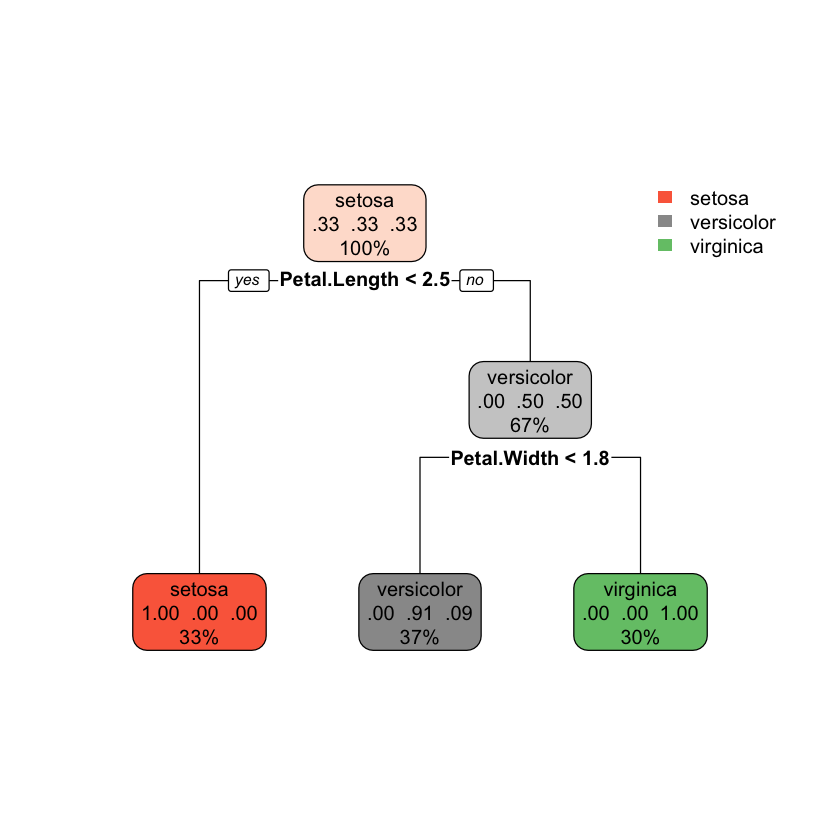

In [6]:
fit.cart <- caret::train(Species~., data=iris_train, method='rpart',
                         metric=metric, trControl=control) # Classification Trees
print(fit.cart) # Overview
rpart.plot::rpart.plot(fit.cart$finalModel, compress=TRUE) # visualization of tree
caret::confusionMatrix(predict(fit.cart, iris_test), iris_test$Species) # Confusion matrix for test data

## Random Forests
These so-called ensemble algorithms predict by using a majority vote of simpler models such as classification trees. For details see the corresponding [Wikipedia article](https://en.wikipedia.org/wiki/Random_forest).
![Random Forest](randomforest.jpg)

In [7]:
fit.rf <- train(Species~., data=iris_train, method='rf',
                metric=metric, trControl=control) # Random Forest
print(fit.rf) # Overview
caret::confusionMatrix(predict(fit.rf, iris_test), iris_test$Species) # Confusion matrix for test data

Random Forest 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa 
  2     0.9500000  0.9250
  3     0.9416667  0.9125
  4     0.9416667  0.9125

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         1
  virginica       0          1         9

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           0.9000
Specificity                 1.0000            0.9500           0.9500
Pos Pred Value              1.0000            0.9000           0.9000
Neg Pred Value              1.0000            0.9500           0.9500
P

## K Nearest Neighbours
These nonparametric algorithms classify by a majority vote of those data points closest to the data point one wants to classify. For details see the corresponding [Wikipedia article](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).
![k nearest neighbours](knn.png)

In [8]:
fit.knn <- caret::train(Species~., data=iris_train, method='knn',
                        metric=metric, trControl=control) # K nearest neighbours
print(fit.knn) # Overview
caret::confusionMatrix(predict(fit.knn, iris_test), iris_test$Species) # Confusion matrix for test data

k-Nearest Neighbors 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa 
  5  0.9666667  0.9500
  7  0.9750000  0.9625
  9  0.9750000  0.9625

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         2
  virginica       0          0         8

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.8000
Specificity                 1.0000            0.9000           1.0000
Pos Pred Value              1.0000            0.8333           1.0000
Neg Pred Value              1.0000            1.0000           0.9091
P

## Support Vector Machines SVM
SVM algorithms try to classify the data by drawing hyperplanes with maximum distance to the data points. For details see the corresponding [Wikipedia Article](https://en.wikipedia.org/wiki/Support-vector_machine).
![svm](svm.png)

In [9]:
fit.svm <- caret::train(Species~., data=iris_train, method='svmRadial',
                        metric=metric, trControl=control) # Support Vector Machines
print(fit.svm) # Overview
caret::confusionMatrix(predict(fit.svm, iris_test), iris_test$Species) # Confusion matrix for test data

Support Vector Machines with Radial Basis Function Kernel 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa 
  0.25  0.9583333  0.9375
  0.50  0.9666667  0.9500
  1.00  0.9666667  0.9500

Tuning parameter 'sigma' was held constant at a value of 0.5060612
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.5060612 and C = 0.5.


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa          9          0         0
  versicolor      1          9         1
  virginica       0          1         9

Overall Statistics
                                          
               Accuracy : 0.9             
                 95% CI : (0.7347, 0.9789)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 1.665e-10       
                                          
                  Kappa : 0.85            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 0.9000            0.9000           0.9000
Specificity                 1.0000            0.9000           0.9500
Pos Pred Value              1.0000            0.8182           0.9000
Neg Pred Value              0.9524            0.9474           0.9500
P

# Comparing the models


Call:
summary.resamples(object = results)

Models: cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
cart 0.9166667 0.9166667 0.9166667 0.9333333 0.9166667    1    0
knn  0.9166667 0.9375000 1.0000000 0.9750000 1.0000000    1    0
svm  0.8333333 0.9375000 1.0000000 0.9666667 1.0000000    1    0
rf   0.8333333 0.9166667 0.9583333 0.9500000 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
cart 0.875 0.87500 0.8750 0.9000   0.875    1    0
knn  0.875 0.90625 1.0000 0.9625   1.000    1    0
svm  0.750 0.90625 1.0000 0.9500   1.000    1    0
rf   0.750 0.87500 0.9375 0.9250   1.000    1    0


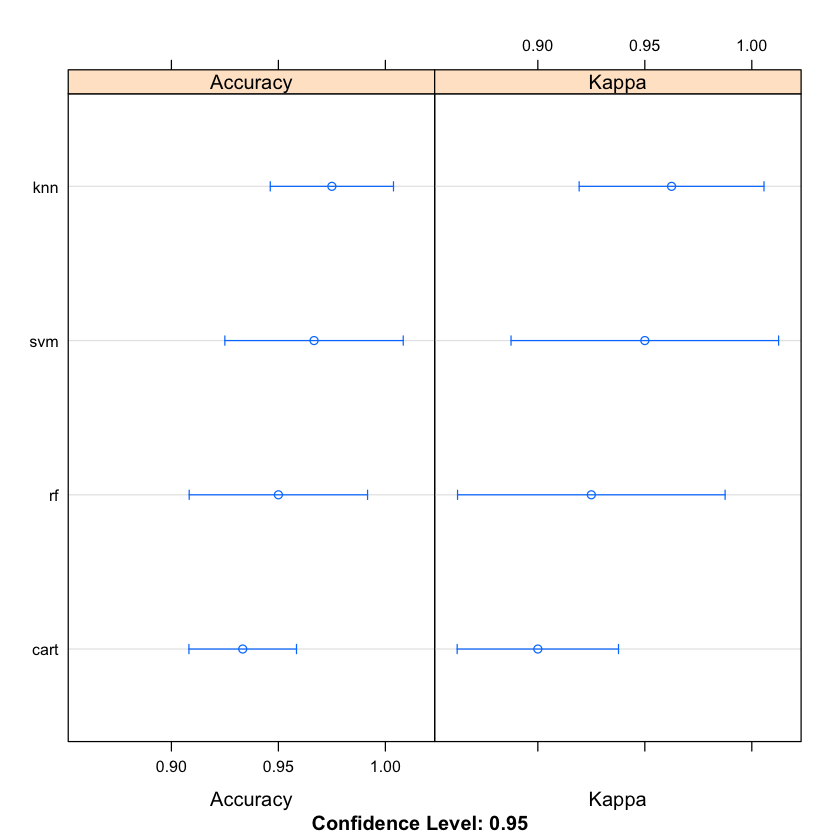

In [10]:
results <- caret::resamples(list(cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results) # show accuracy and kappa (modified version of accuracy) summary of models
dotplot(results) # plot accuracy and kappa summary of models

# The entire code used in one block
This is just included for convenience so everything can be copy-pasted into another document or into an online r server such as [rdrr.io](https://rdrr.io/snippets/)

In [ ]:
# install.packages(c('caret', 'e1071', 'kernlab', 'rpart.plot')) 
library(caret) # this package does the main lifting
library(e1071) # support functions for caret
library(kernlab) # support functions for caret
library(rpart.plot) # needed for plotting

iris_split <- caret::createDataPartition(iris$Species, p = 0.8, list = FALSE) # Indices for splitting data
iris_train <- iris[iris_split,] # 80% of data used for training
iris_test <- iris[-iris_split,] # 20% of data used for testing and validation

head(iris_train) # What does the training data look like?
summary(iris_train) # Statistcal summary of training data
str(iris_train) # Structural info of training data
levels(iris_train$Species) # List of categories of the target variable we want to predict
table(iris_train$Species) # Distribution of target variable

X <- iris_train[,1:ncol(iris_train)-1] 
y <- iris_train[,ncol(iris_train)]
caret::featurePlot(x=X, y=y, plot='pairs') # pairwise plot, e.g. for checking strong correlations etc.
caret::featurePlot(x=X, y=y, plot='box') # boxplot
caret::featurePlot(x=X, y=y, plot='density',
                   scales=list(x=list(relation='free'), y=list(relation='free'))) # density plot

control <- caret::trainControl(method='cv', number=10) # using 10-fold cross validation
metric <- 'Accuracy' # using accuracy as a quality metric

fit.cart <- caret::train(Species~., data=iris_train, method='rpart',
                         metric=metric, trControl=control) # Classification Trees
print(fit.cart) # Overview
rpart.plot::rpart.plot(fit.cart$finalModel, compress=TRUE) # visualization of tree
caret::confusionMatrix(predict(fit.cart, iris_test), iris_test$Species) # Confusion matrix for test data

fit.rf <- train(Species~., data=iris_train, method='rf',
                metric=metric, trControl=control) # Random Forest
print(fit.rf) # Overview
caret::confusionMatrix(predict(fit.rf, iris_test), iris_test$Species) # Confusion matrix for test data

fit.knn <- caret::train(Species~., data=iris_train, method='knn',
                        metric=metric, trControl=control) # K nearest neighbours
print(fit.knn) # Overview
caret::confusionMatrix(predict(fit.knn, iris_test), iris_test$Species) # Confusion matrix for test data

fit.svm <- caret::train(Species~., data=iris_train, method='svmRadial',
                        metric=metric, trControl=control) # Support Vector Machines
print(fit.svm) # Overview
caret::confusionMatrix(predict(fit.svm, iris_test), iris_test$Species) # Confusion matrix for test data

results <- caret::resamples(list(cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results) # show accuracy and kappa (modified version of accuracy) summary of models
dotplot(results) # plot accuracy and kappa summary of models

In [13]:
library(shapper)
shapper::